In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


In [14]:
cardf=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/auto-mpg.csv")

In [15]:
cardf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
cardf.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [18]:
cardf.shape

(398, 9)

In [20]:
cardf.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
138,14.0,8,318.0,150,4457,13.5,74,1,dodge coronet custom (sw)
151,31.0,4,79.0,67,2000,16.0,74,2,fiat x1.9
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin
130,26.0,4,122.0,80,2451,16.5,74,1,ford pinto
209,19.0,4,120.0,88,3270,21.9,76,2,peugeot 504
321,32.2,4,108.0,75,2265,15.2,80,3,toyota corolla
213,13.0,8,350.0,145,4055,12.0,76,1,chevy c10
186,27.0,4,101.0,83,2202,15.3,76,2,renault 12tl
184,25.0,4,140.0,92,2572,14.9,76,1,capri ii
83,28.0,4,98.0,80,2164,15.0,72,1,dodge colt (sw)


In [21]:
#dropping car name 
cardf=cardf.drop('car name',axis=1)

In [22]:
cardf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [23]:
#replacing categorical with actual values in origin
cardf['origin']=cardf['origin'].replace({1:'America',2:'Europe',3:'asia'})
cardf.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
203,29.5,4,97.0,71,1825,12.2,76,Europe
59,23.0,4,97.0,54,2254,23.5,72,Europe
353,33.0,4,105.0,74,2190,14.2,81,Europe
150,26.0,4,108.0,93,2391,15.5,74,asia
121,15.0,8,318.0,150,3399,11.0,73,America
348,37.7,4,89.0,62,2050,17.3,81,asia
228,18.5,6,250.0,98,3525,19.0,77,America
115,15.0,8,350.0,145,4082,13.0,73,America
294,34.1,4,86.0,65,1975,15.2,79,asia
221,17.5,8,305.0,145,3880,12.5,77,America


In [26]:
#one hot encoding
cardf=pd.get_dummies(cardf,columns=['origin'])
cardf.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_asia
233,29.0,4,97.0,78,1940,14.5,77,0,1,0
288,18.2,8,318.0,135,3830,15.2,79,1,0,0
148,26.0,4,116.0,75,2246,14.0,74,0,1,0
346,32.3,4,97.0,67,2065,17.8,81,0,0,1
278,31.5,4,89.0,71,1990,14.9,78,0,1,0
118,24.0,4,116.0,75,2158,15.5,73,0,1,0
37,18.0,6,232.0,100,3288,15.5,71,1,0,0
93,14.0,8,318.0,150,4237,14.5,73,1,0,0
221,17.5,8,305.0,145,3880,12.5,77,1,0,0
201,18.5,6,250.0,110,3645,16.2,76,1,0,0


#### deals of missing values

In [27]:
# a quick summary of data columns
cardf.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_America,origin_Europe,origin_asia
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [30]:
cardf.describe(include="all") 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_asia
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [28]:
#here horsepower is an object because of a ? mark
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_Europe   398 non-null    uint8  
 9   origin_asia     398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [31]:
cardf.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Europe       uint8
origin_asia         uint8
dtype: object

###replaing ? with

In [32]:
cardf['horsepower']=cardf['horsepower'].replace(to_replace='?',value=np.nan)
cardf['horsepower']=cardf['horsepower'].astype(float)

In [34]:
cardf.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_asia
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [35]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      392 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_Europe   398 non-null    uint8  
 9   origin_asia     398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


#### missing values 8 in hp now

In [37]:
median=cardf['horsepower'].median()
cardf['horsepower'].replace(np.nan,median,inplace=True)

In [38]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_Europe   398 non-null    uint8  
 9   origin_asia     398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


##### no missing values in hp now

## bivariate Plots

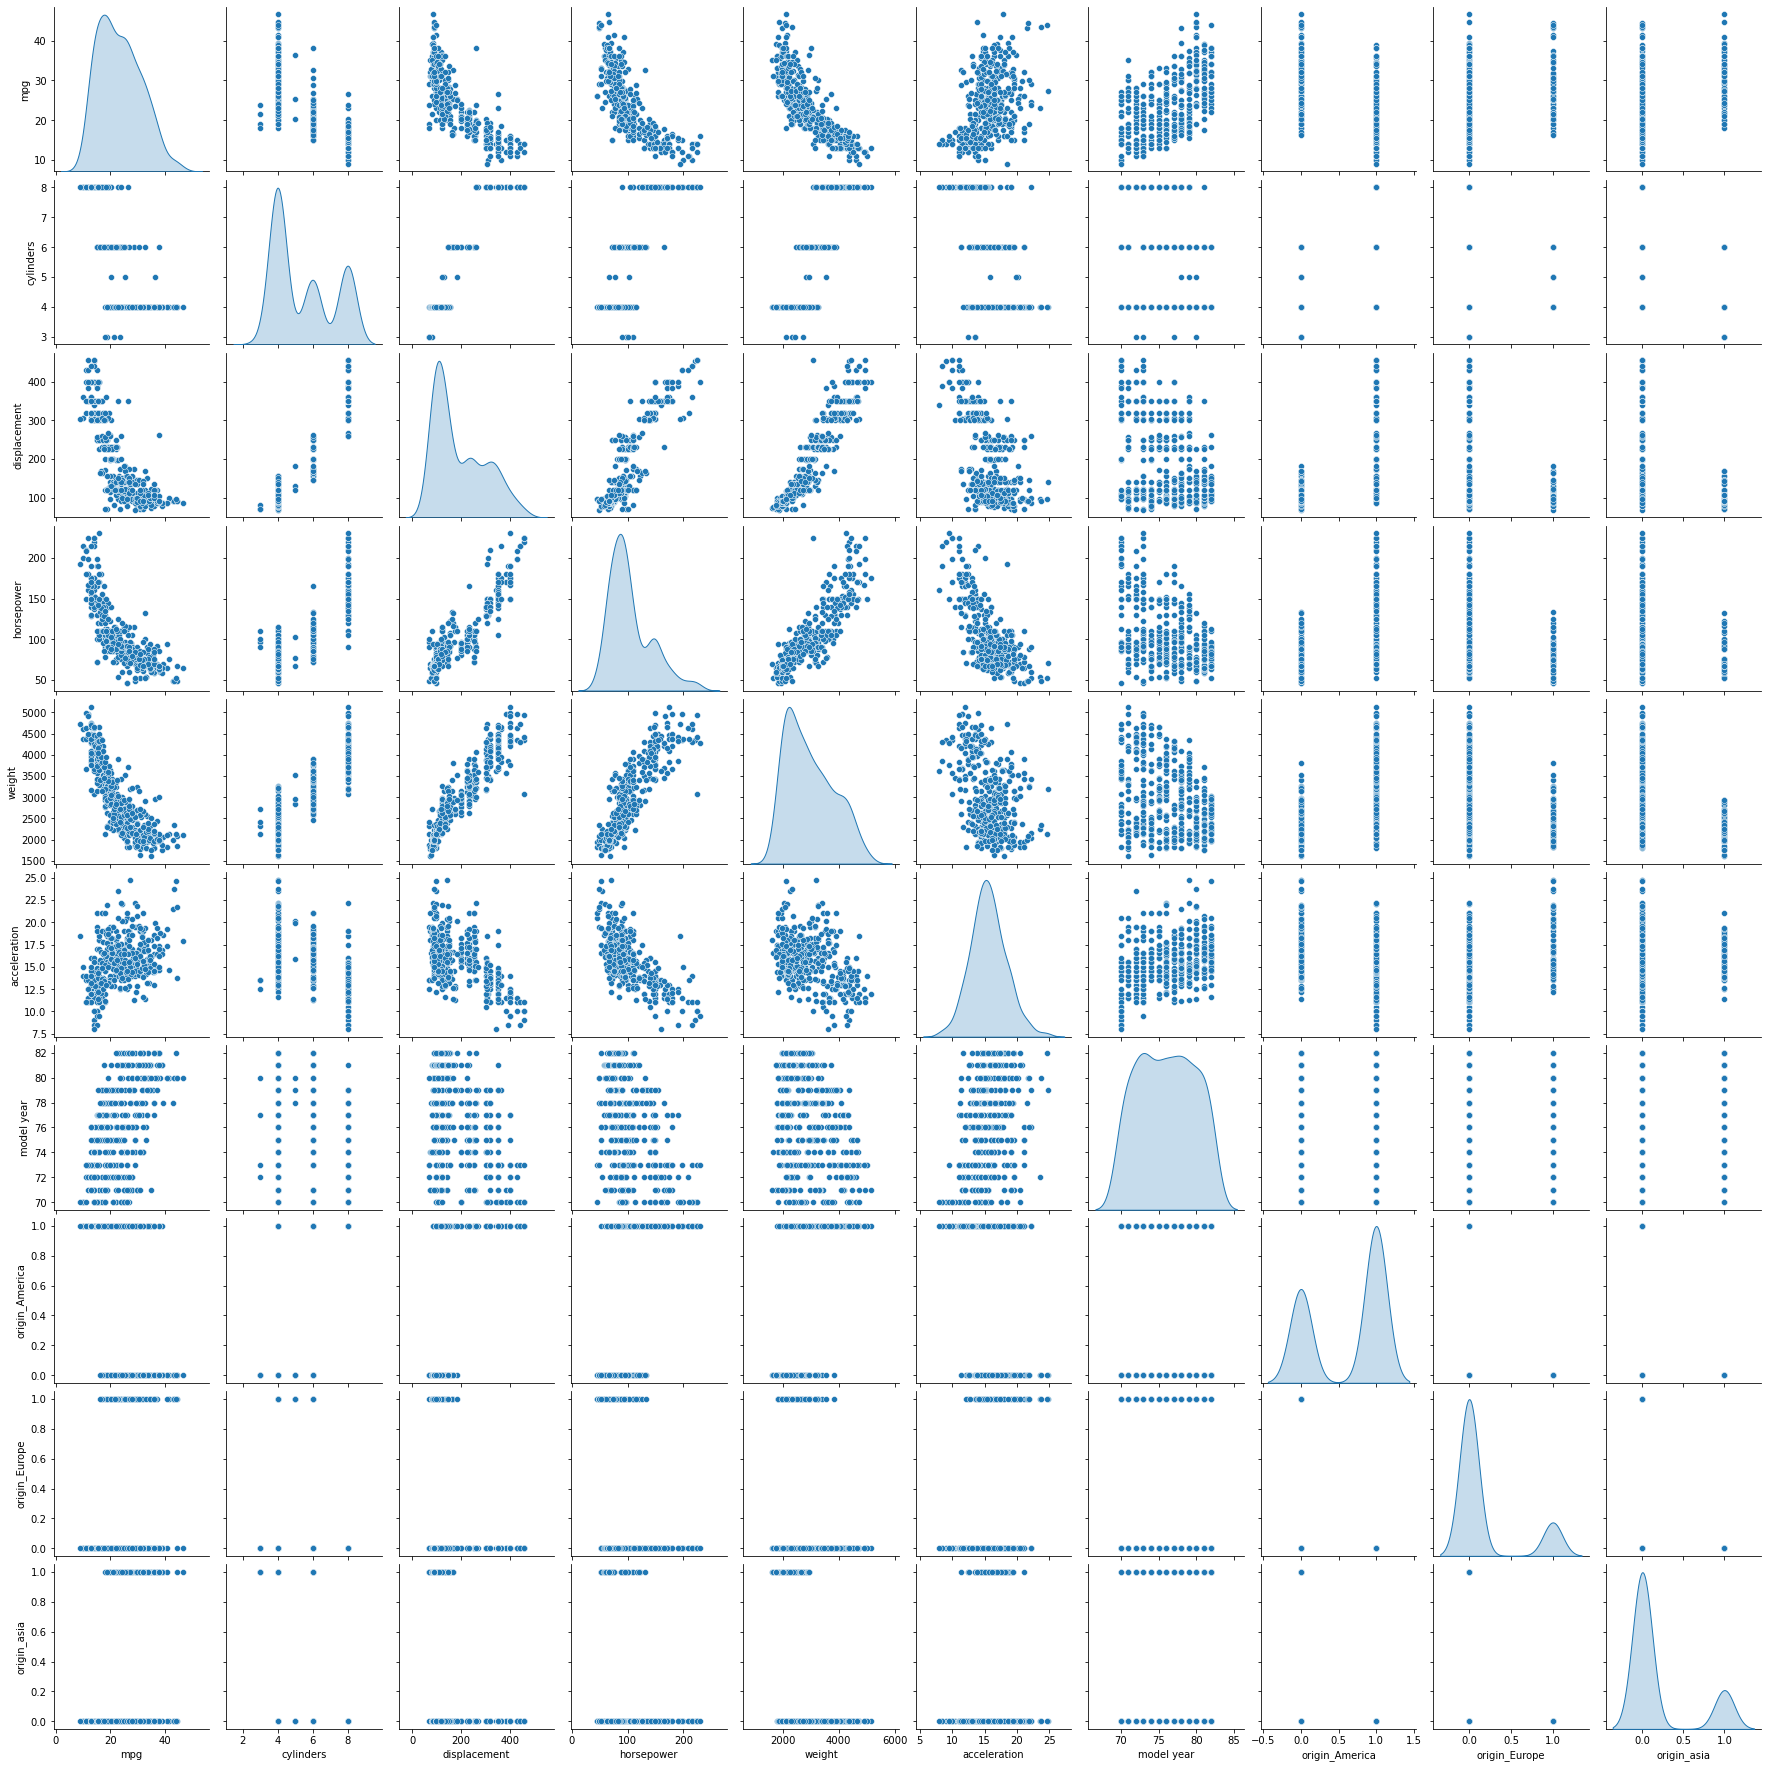

In [39]:
sns.pairplot(cardf,diag_kind='kde')

In [40]:
cardf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_asia
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


## Split data

In [42]:
# build linear model
# independent variable
x=cardf.drop(['mpg'],axis=1)
# dependent variable 
y=cardf[['mpg']]

In [47]:
# split x and y in train and test data 70 :30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

## Fit Linear Model


In [49]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [50]:
reg_model.score(x_train,y_train)

0.8141025501610559

In [52]:
reg_model.score(x_test,y_test)

0.8433135132808829

# try with polinomial features


In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=2, interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)

print(poly_clf.score(x_train2,y_train))
print(poly_clf.score(x_test2,y_test))

0.8995492103406467
0.8613490752531906


In [55]:
# out of sample (testing )
print(poly_clf.score(x_test2,y_test))

0.8613490752531906


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=3, interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)

print(poly_clf.score(x_train2,y_train))
print(poly_clf.score(x_test2,y_test))

0.9186419116511212
0.5122881377209407


In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=4, interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)

print(poly_clf.score(x_train2,y_train))
print(poly_clf.score(x_test2,y_test))

0.961187121011589
-58.182437866846065
